In [1]:
#Libraries for NN training 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

import os


In [ ]:

import shutil

def extract_images_with_keyword(root_dir, destination_dir, keyword):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Walk through all subdirectories and files
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            # Check if the keyword is in the filename
            if keyword in filename:
                source_file = os.path.join(dirpath, filename)
                dest_file = os.path.join(destination_dir, filename)
                # Copy the file to the destination directory
                shutil.copy2(source_file, dest_file)
                #print(f"Copied: {source_file} to {dest_file}")

#Absolute file paths, need to be changed when running non-locally 
#Same thing with all image directory calls
#
root_directory = '/Users/johannes/Downloads/BreaKHis_v1/histology_slides'         
destination_directory = '/Users/johannes/Desktop/FocusAreaDS/Images/full'  
keyword = ''

extract_images_with_keyword(root_directory, destination_directory, keyword)


Code for one-layer NN follows 

Epoch 1/10
33/33 [==============================] - 0s 4ms/step - loss: 0.7921 - accuracy: 0.6145 - precision: 0.6852 - recall: 0.7631 - val_loss: 0.5436 - val_accuracy: 0.6569 - val_precision: 0.6569 - val_recall: 1.0000
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7839 - precision: 0.7697 - recall: 0.9569 - val_loss: 0.4983 - val_accuracy: 0.7992 - val_precision: 0.7746 - val_recall: 0.9792
Epoch 3/10
33/33 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8280 - precision: 0.8208 - recall: 0.9439 - val_loss: 0.4765 - val_accuracy: 0.8460 - val_precision: 0.8431 - val_recall: 0.9407
Epoch 4/10
33/33 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.8443 - precision: 0.8456 - recall: 0.9332 - val_loss: 0.6082 - val_accuracy: 0.6667 - val_precision: 0.8952 - val_recall: 0.5579
Epoch 5/10
33/33 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7824 - precision: 0

<Figure size 800x600 with 0 Axes>

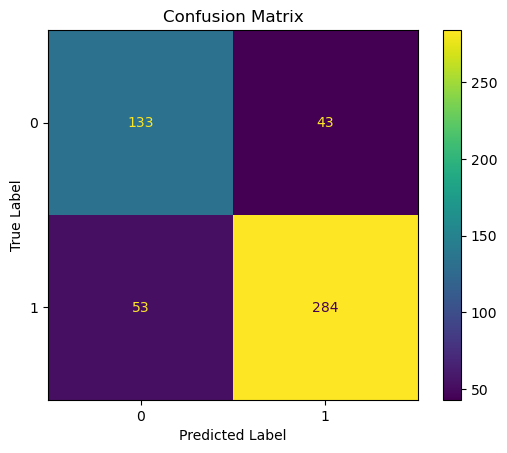

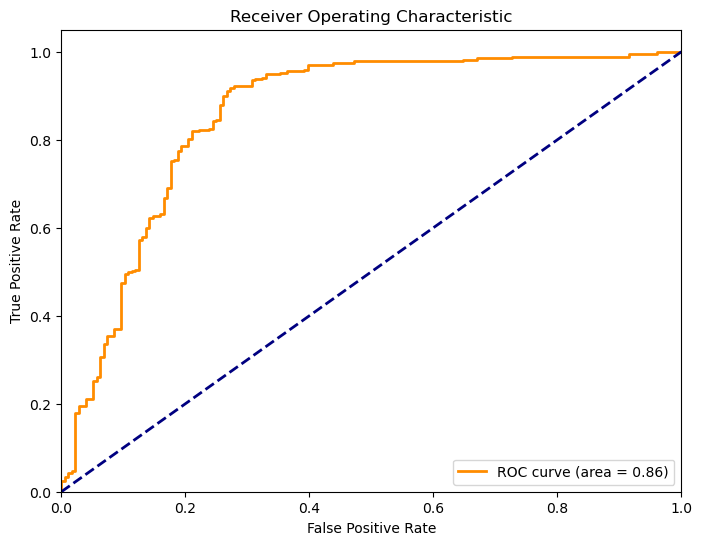

In [19]:
#Code for simple neural network 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os


image_directory = '/Users/johannes/Desktop/FocusAreaDS/Images'

# Function to load and preprocess images
def load_and_preprocess_images(directory):
  images = []
  labels = []
  for filename in os.listdir(directory):
    if (".jpg") in filename or filename.endswith(".png"):
      img_path = os.path.join(directory, filename)
      try:
        img = Image.open(img_path)
        img = img.resize((28, 28))
        img_array = np.array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
        label = (filename.split('.')[0].split('_')[1])
        if label == 'B': label = 0
        elif label == 'M': label = 1
        labels.append(label)
      except Exception as e:
        print(f"Error processing {filename}: {e}")

  return np.array(images), np.array(labels)

x, y = load_and_preprocess_images(image_directory)

x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=42)

# Preprocess the data
x_train = x_train.reshape((-1, 28 * 28 * 3))
x_test = x_test.reshape((-1, 28 * 28 * 3))
x_val = x_val.reshape((-1, 28 * 28 * 3))

# Define the model
model = Sequential([
        layers.Input(shape=(28 * 28 * 3,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', "Precision", "Recall"])

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the model
score_test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])

score_val = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])

## Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = (y_pred >= 0.5).astype(int).flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Code for simple CNN follows

Epoch 1/2
12/12 [==============================] - 0s 877us/step - loss: 0.8821 - accuracy: 0.5515
Epoch 2/2
12/12 [==============================] - 0s 421us/step - loss: 0.6384 - accuracy: 0.6896
Test accuracy: 0.6895604133605957
12/12 [==============================] - 0s 314us/step


<Figure size 800x600 with 0 Axes>

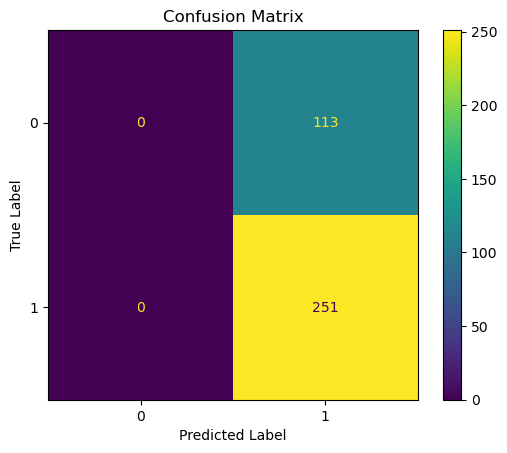

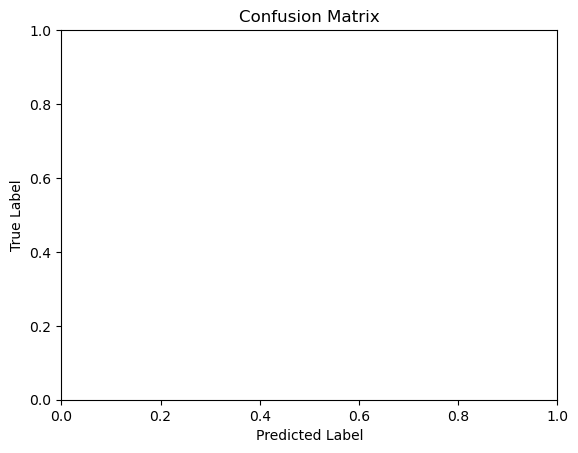

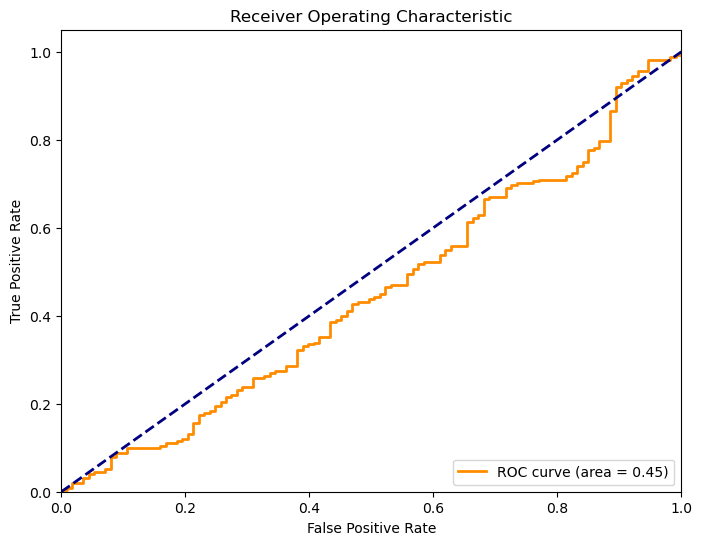

In [48]:
#Code for simple NN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

image_directory = '/Users/johannes/Desktop/FocusAreaDS/Images'

# Function to load and preprocess images
def load_and_preprocess_images(directory):
  images = []
  labels = []
  
  for filename in os.listdir(directory):
    if (".jpg") in filename or filename.endswith(".png"):
      img_path = os.path.join(directory, filename)
      try:
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to MNIST dimensions
        img_array = np.array(img) / 255.0  # Normalize pixel values
        images.append(img_array)

        # Extract label from filename (e.g., "image_3.jpg" -> label 3)
        label = (filename.split('.')[0].split('_')[1])
        if label == 'B': label = 0
        elif label == 'M': label = 1
        labels.append(label)

      except Exception as e:
        print(f"Error processing {filename}: {e}")

  return np.array(images), np.array(labels)

# Load and preprocess your own images
x, y = load_and_preprocess_images(image_directory)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert labels to categorical format
y_train = keras.utils.to_categorical(y_train, num_classes=2)  
y_test = keras.utils.to_categorical(y_test, num_classes=2)

# Define the model (same as before)
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=2,
          verbose=1)

# Evaluate the model
# Accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



Code for VGG with many Epochs follows 

In [27]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Image loading function (similar to previous example)
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                # Open image and resize to VGG19 input size
                img = Image.open(img_path).convert("RGB")  # Note: VGG19 requires RGB
                img = img.resize((224, 224))  # VGG19 expects 224x224 input
                img_array = np.array(img)
                images.append(img_array)
                
                # Extract label
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1  # Binary classification
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images')

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Preprocess images for VGG19
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Load pre-trained VGG19 model without top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32  # May need to adjust based on your GPU/memory
)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Optional: Fine-tuning
# Unfreeze some top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Continue training
history_fine = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=15,
    batch_size=32
)

80150528/80134624 [==============================] - 10s 0us/step
Epoch 1/10
46/46 [==============================] - 214s 5s/step - loss: 1.1387 - accuracy: 0.6504 - val_loss: 0.5418 - val_accuracy: 0.8214
Epoch 2/10
46/46 [==============================] - 364s 8s/step - loss: 0.6653 - accuracy: 0.7740 - val_loss: 0.4898 - val_accuracy: 0.8489
Epoch 3/10
46/46 [==============================] - 2198s 49s/step - loss: 0.6132 - accuracy: 0.8001 - val_loss: 0.3829 - val_accuracy: 0.8736
Epoch 4/10
46/46 [==============================] - 199s 4s/step - loss: 0.4898 - accuracy: 0.8187 - val_loss: 0.3577 - val_accuracy: 0.8736
Epoch 5/10
46/46 [==============================] - 233s 5s/step - loss: 0.4148 - accuracy: 0.8503 - val_loss: 0.3237 - val_accuracy: 0.8819
Epoch 6/10
46/46 [==============================] - 231s 5s/step - loss: 0.3901 - accuracy: 0.8592 - val_loss: 0.3169 - val_accuracy: 0.8901
Epoch 7/10
46/46 [==============================] - 1323s 29s/step - loss: 0.3882 - ac

VGG Proper, used further 

In [37]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                img_array = np.array(img)
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_VGG, x_val_VGG, y_train_VGG, y_val_VGG = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_VGG,
    y_train_VGG,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_VGG,
    y_val_VGG,
    batch_size=batch_size,
    shuffle=False
)

test_generator = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)

# Load pre-trained VGG19 model
base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
VGG19_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
VGG19_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Calculate steps per epoch
steps_per_epoch = len(x_train_VGG) // batch_size
validation_steps = len(x_val_VGG) // batch_size
test_steps = len(x_test_final) // batch_size

# Train the model using generators
history_VGG = VGG19_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = VGG19_model.evaluate(test_generator, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/30
129/129 [==============================] - 689s 5s/step - loss: 0.5673 - accuracy: 0.8001 - precision: 0.8392 - recall: 0.8609 - val_loss: 0.2695 - val_accuracy: 0.8929 - val_precision: 0.8968 - val_recall: 0.9456 - lr: 0.0010
Epoch 2/30
129/129 [==============================] - 691s 5s/step - loss: 0.3522 - accuracy: 0.8542 - precision: 0.8791 - recall: 0.9016 - val_loss: 0.2477 - val_accuracy: 0.9040 - val_precision: 0.8984 - val_recall: 0.9626 - lr: 0.0010
Epoch 3/30
129/129 [==============================] - 580s 4s/step - loss: 0.3275 - accuracy: 0.8695 - precision: 0.8907 - recall: 0.9131 - val_loss: 0.2100 - val_accuracy: 0.9241 - val_precision: 0.9248 - val_recall: 0.9626 - lr: 0.0010
Epoch 4/30
129/129 [==============================] - 579s 4s/step - loss: 0.2819 - accuracy: 0.8901 - precision: 0.9052 - recall: 0.9302 - val_loss: 0.2085 - val_accuracy: 0.9085 - val_precision: 0.9567 - val_recall: 0.9014 - lr: 0.0010
Epoch 5/30
129/129 [============================

Next cells contain code for training/validating ResNet

In [11]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                img_array = np.array(img)
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_ResNet, x_val_ResNet, y_train_ResNet, y_val_ResNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_ResNet,
    y_train_ResNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_ResNet,
    y_val_ResNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)

# Load pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
Resnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
Resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Calculate steps per epoch
steps_per_epoch = len(x_train_ResNet) // batch_size
validation_steps = len(x_val_ResNet) // batch_size
test_steps = len(x_test_final) // batch_size

# Train the model using generators
history_Res400 = Resnet_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = Resnet_model.evaluate(test_generator, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Create confusion matrix using test set
#test_pred = model.predict(test_generator, steps=test_steps)
#test_pred_classes = (test_pred >= 0.5).astype(int).flatten()
#conf_matrix = confusion_matrix(y_test_final, test_pred_classes)



Epoch 1/30
129/129 [==============================] - 116s 887ms/step - loss: 0.4085 - accuracy: 0.8448 - precision: 0.8690 - recall: 0.8992 - val_loss: 0.2350 - val_accuracy: 0.9152 - val_precision: 0.9638 - val_recall: 0.9048 - lr: 0.0010
Epoch 2/30
129/129 [==============================] - 122s 942ms/step - loss: 0.2321 - accuracy: 0.9066 - precision: 0.9215 - recall: 0.9375 - val_loss: 0.1680 - val_accuracy: 0.9375 - val_precision: 0.9618 - val_recall: 0.9422 - lr: 0.0010
Epoch 3/30
129/129 [==============================] - 124s 960ms/step - loss: 0.2097 - accuracy: 0.9168 - precision: 0.9310 - recall: 0.9431 - val_loss: 0.1391 - val_accuracy: 0.9487 - val_precision: 0.9689 - val_recall: 0.9524 - lr: 0.0010
Epoch 4/30
129/129 [==============================] - 132s 1s/step - loss: 0.1837 - accuracy: 0.9234 - precision: 0.9377 - recall: 0.9460 - val_loss: 0.1331 - val_accuracy: 0.9420 - val_precision: 0.9786 - val_recall: 0.9320 - lr: 0.0010
Epoch 5/30
129/129 [===================

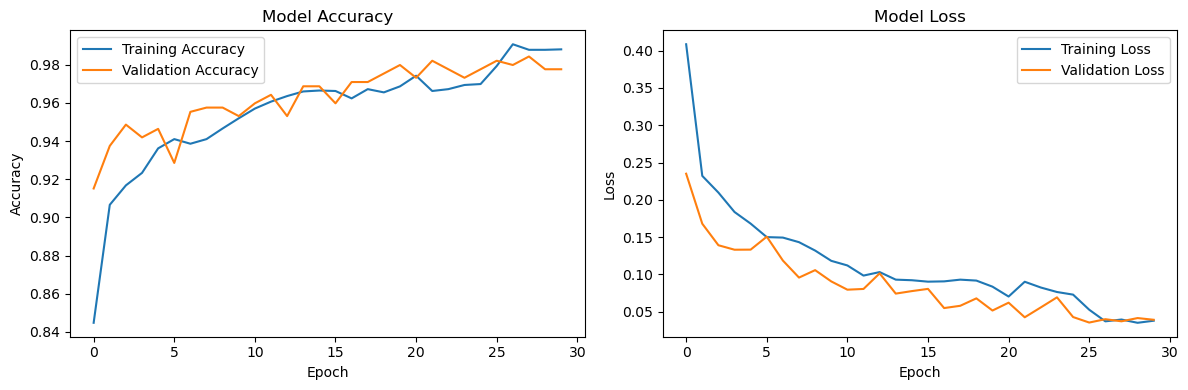

In [12]:
plot_training_history(history_Res400)

ResNet on full dataset

In [14]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                img_array = np.array(img)
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images/full')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_ResNet, x_val_ResNet, y_train_ResNet, y_val_ResNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_ResNet,
    y_train_ResNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_ResNet,
    y_val_ResNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator_full = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)

# Load pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
Resnet_model_full = Model(inputs=base_model.input, outputs=output)

# Compile the model
Resnet_model_full.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Calculate steps per epoch
steps_per_epoch = len(x_train_ResNet) // batch_size
validation_steps = len(x_val_ResNet) // batch_size
test_steps = len(x_test_final) // batch_size

# Train the model using generators
history_ResFull = Resnet_model_full.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = Resnet_model_full.evaluate(test_generator_full, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Create confusion matrix using test set
#test_pred = model.predict(test_generator, steps=test_steps)
#test_pred_classes = (test_pred >= 0.5).astype(int).flatten()
#conf_matrix = confusion_matrix(y_test_final, test_pred_classes)


Epoch 1/30
200/200 [==============================] - 196s 974ms/step - loss: 0.3944 - accuracy: 0.8431 - precision: 0.8676 - recall: 0.9101 - val_loss: 0.2876 - val_accuracy: 0.8920 - val_precision: 0.9810 - val_recall: 0.8589 - lr: 0.0010
Epoch 2/30
200/200 [==============================] - 193s 963ms/step - loss: 0.2744 - accuracy: 0.8896 - precision: 0.9080 - recall: 0.9338 - val_loss: 0.1924 - val_accuracy: 0.9304 - val_precision: 0.9501 - val_recall: 0.9481 - lr: 0.0010
Epoch 3/30
200/200 [==============================] - 198s 988ms/step - loss: 0.2376 - accuracy: 0.9059 - precision: 0.9214 - recall: 0.9433 - val_loss: 0.1813 - val_accuracy: 0.9332 - val_precision: 0.9522 - val_recall: 0.9502 - lr: 0.0010
Epoch 4/30
200/200 [==============================] - 238s 1s/step - loss: 0.2174 - accuracy: 0.9118 - precision: 0.9253 - recall: 0.9481 - val_loss: 0.1712 - val_accuracy: 0.9418 - val_precision: 0.9584 - val_recall: 0.9564 - lr: 0.0010
Epoch 5/30
200/200 [===================

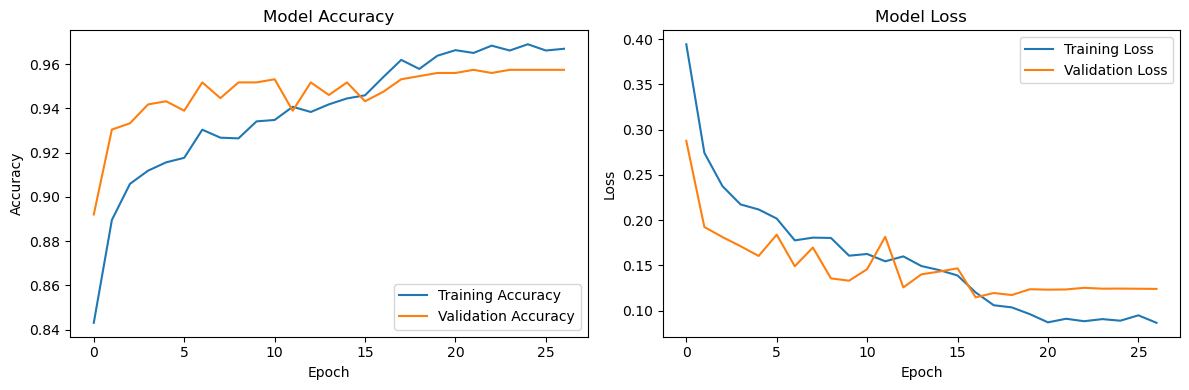

In [15]:
plot_training_history(history_ResFull)

ResNet on 40X

Epoch 1/30
53/53 [==============================] - 71s 1s/step - loss: 0.6596 - accuracy: 0.7657 - precision: 0.8207 - recall: 0.8523 - val_loss: 0.2399 - val_accuracy: 0.9187 - val_precision: 0.9573 - val_recall: 0.9333 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 70s 1s/step - loss: 0.2904 - accuracy: 0.8844 - precision: 0.8993 - recall: 0.9413 - val_loss: 0.1775 - val_accuracy: 0.9187 - val_precision: 0.9421 - val_recall: 0.9500 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 69s 1s/step - loss: 0.2524 - accuracy: 0.8999 - precision: 0.9145 - recall: 0.9464 - val_loss: 0.1704 - val_accuracy: 0.9438 - val_precision: 0.9826 - val_recall: 0.9417 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 69s 1s/step - loss: 0.2253 - accuracy: 0.9203 - precision: 0.9326 - recall: 0.9557 - val_loss: 0.1415 - val_accuracy: 0.9438 - val_precision: 0.9912 - val_recall: 0.9333 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 69s 1s/s

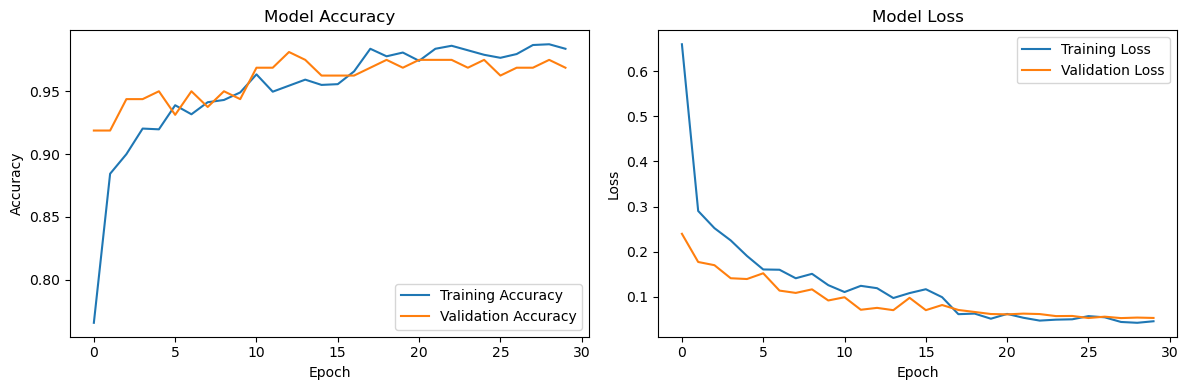

In [40]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import skimage
from skimage import exposure
from skimage.color import rgb2gray

# Contrast stretching
#normalized = exposure.rescale_intensity(image)

# Histogram equalization
#equalized = exposure.equalize_hist(image)

# Adaptive histogram equalization (often best for classification)
#adapted = exposure.equalize_adapthist(image)

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if (filename.endswith(".jpg") or filename.endswith(".png")) and "40-" in filename:
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                
                img_array = (np.array(img))
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images/full')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_ResNet, x_val_ResNet, y_train_ResNet, y_val_ResNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_ResNet,
    y_train_ResNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_ResNet,
    y_val_ResNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator_full = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)

# Load pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
Resnet_model_40X = Model(inputs=base_model.input, outputs=output)

# Compile the model
Resnet_model_40X.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Calculate steps per epoch
steps_per_epoch = len(x_train_ResNet) // batch_size
validation_steps = len(x_val_ResNet) // batch_size
test_steps = len(x_test_final) // batch_size

# Train the model using generators
history = Resnet_model_40X.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = Resnet_model_40X.evaluate(test_generator_full, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

import matplotlib.pyplot as plt

def plot_training_history(history1):
    # Combine histories
    acc = history1.history['accuracy'] 
    val_acc = history1.history['val_accuracy'] 
    loss = history1.history['loss'] 
    val_loss = history1.history['val_loss'] 
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

ResNet on 40X with grayscale

In [ ]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import skimage
from skimage import exposure
from skimage.color import rgb2gray

# Contrast stretching
#normalized = exposure.rescale_intensity(image)

# Histogram equalization
#equalized = exposure.equalize_hist(image)

# Adaptive histogram equalization (often best for classification)
#adapted = exposure.equalize_adapthist(image)

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if (filename.endswith(".jpg") or filename.endswith(".png")) and "40-" in filename:
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                
                img_array = np.expand_dims(np.array(img), axis=0)
                gray_image = rgb2gray(img_array)
                if gray_image.shape[2] != 3:
                    gray_image = np.expand_dims(np.mean(gray_image, axis=2), axis=2)
                    gray_image = np.repeat(gray_image, 3, axis=2)

                
                adapted = exposure.equalize_adapthist(gray_image)
                images.append(adapted)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images/full')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_ResNet, x_val_ResNet, y_train_ResNet, y_val_ResNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_ResNet,
    y_train_ResNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_ResNet,
    y_val_ResNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator_full = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)

# Load pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
Resnet_model_40X = Model(inputs=base_model.input, outputs=output)

# Compile the model
Resnet_model_40X.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Calculate steps per epoch
steps_per_epoch = len(x_train_ResNet) // batch_size
validation_steps = len(x_val_ResNet) // batch_size
test_steps = len(x_test_final) // batch_size

# Train the model using generators
history = Resnet_model_40X.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = Resnet_model_40X.evaluate(test_generator_full, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

import matplotlib.pyplot as plt

def plot_training_history(history1):
    # Combine histories
    acc = history1.history['accuracy'] 
    val_acc = history1.history['val_accuracy'] 
    loss = history1.history['loss'] 
    val_loss = history1.history['val_loss'] 
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
#plot_training_history(history_phase1, history_phase2)

Epoch 1/30
53/53 [==============================] - 6s 96ms/step - loss: 0.8395 - accuracy: 0.6123 - precision: 0.6979 - recall: 0.7923 - val_loss: 0.5694 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 5s 91ms/step - loss: 0.6318 - accuracy: 0.6908 - precision: 0.7034 - recall: 0.9711 - val_loss: 0.5653 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 5s 91ms/step - loss: 0.6241 - accuracy: 0.6998 - precision: 0.7013 - recall: 0.9966 - val_loss: 0.5922 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 1.0000 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 5s 94ms/step - loss: 0.6271 - accuracy: 0.7010 - precision: 0.7010 - recall: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 1.0000 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 5s 9

: 

Code for DenseNet follows 

In [4]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                img_array = np.array(img)
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_DenseNet, x_val_DenseNet, y_train_DenseNet, y_val_DenseNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator = train_datagen.flow(
    x_train_DenseNet,
    y_train_DenseNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = val_datagen.flow(
    x_val_DenseNet,
    y_val_DenseNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator_Dense = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)


# Load pre-trained DenseNet121 model
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# First phase: Train only the top layers
base_model.trainable = False

# Enhanced custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
DenseNet_model = Model(inputs=base_model.input, outputs=output)

# First phase compilation
DenseNet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)



# Calculate steps per epoch
steps_per_epoch = len(x_train_DenseNet) // batch_size
validation_steps = len(x_val_DenseNet) // batch_size
test_steps = len(x_test_final) // batch_size

# First training phase
print("First training phase - training top layers only:")
history_phase1 = DenseNet_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,  # Reduced epochs for first phase
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Second phase: Fine-tune the top layers of the base model
# Unfreeze some layers of the base model
#for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
#    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
#DenseNet_model.compile(
#    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
#    loss='binary_crossentropy',
#    metrics=['accuracy', 'Precision', 'Recall']
#)

# Second training phase
#print("Second training phase - fine-tuning:")
#history_phase2 = DenseNet_model.fit(
#    train_generator,
#    steps_per_epoch=steps_per_epoch,
#    epochs=30,
#    validation_data=validation_generator,
#    validation_steps=validation_steps,
#    callbacks=[reduce_lr, early_stopping]
#)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = DenseNet_model.evaluate(test_generator_Dense, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Optional: Plot training history
import matplotlib.pyplot as plt

# Plot the training history
plot_training_history(history_phase1)


First training phase - training top layers only:
Epoch 1/40


2024-11-18 14:23:46.459191: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


129/129 [==============================] - 107s 815ms/step - loss: 0.4264 - accuracy: 0.8438 - precision: 0.8952 - recall: 0.8628 - val_loss: 0.2386 - val_accuracy: 0.8973 - val_precision: 0.9526 - val_recall: 0.8878 - lr: 0.0010
Epoch 2/40
129/129 [==============================] - 116s 897ms/step - loss: 0.2847 - accuracy: 0.8923 - precision: 0.9131 - recall: 0.9239 - val_loss: 0.1643 - val_accuracy: 0.9263 - val_precision: 0.9516 - val_recall: 0.9354 - lr: 0.0010
Epoch 3/40
129/129 [==============================] - 131s 1s/step - loss: 0.2277 - accuracy: 0.9105 - precision: 0.9289 - recall: 0.9354 - val_loss: 0.1693 - val_accuracy: 0.9330 - val_precision: 0.9400 - val_recall: 0.9592 - lr: 0.0010
Epoch 4/40
129/129 [==============================] - 157s 1s/step - loss: 0.2058 - accuracy: 0.9180 - precision: 0.9321 - recall: 0.9438 - val_loss: 0.1500 - val_accuracy: 0.9330 - val_precision: 0.9783 - val_recall: 0.9184 - lr: 0.0010
Epoch 5/40
129/129 [==============================] -

NameError: name 'plot_training_history' is not defined

DenseNet on Full set next 

First training phase - training top layers only:
Epoch 1/30
200/200 [==============================] - 181s 894ms/step - loss: 0.4317 - accuracy: 0.8335 - precision: 0.8940 - recall: 0.8594 - val_loss: 0.2501 - val_accuracy: 0.9077 - val_precision: 0.9162 - val_recall: 0.9523 - lr: 0.0010
Epoch 2/30
200/200 [==============================] - 203s 1s/step - loss: 0.2923 - accuracy: 0.8823 - precision: 0.9093 - recall: 0.9205 - val_loss: 0.2239 - val_accuracy: 0.9134 - val_precision: 0.9056 - val_recall: 0.9751 - lr: 0.0010
Epoch 3/30
200/200 [==============================] - 216s 1s/step - loss: 0.2626 - accuracy: 0.8965 - precision: 0.9161 - recall: 0.9349 - val_loss: 0.2497 - val_accuracy: 0.9119 - val_precision: 0.9118 - val_recall: 0.9647 - lr: 0.0010
Epoch 4/30
200/200 [==============================] - 197s 986ms/step - loss: 0.2461 - accuracy: 0.9013 - precision: 0.9238 - recall: 0.9333 - val_loss: 0.2061 - val_accuracy: 0.9219 - val_precision: 0.9279 - val_recall: 0.9606 - lr: 

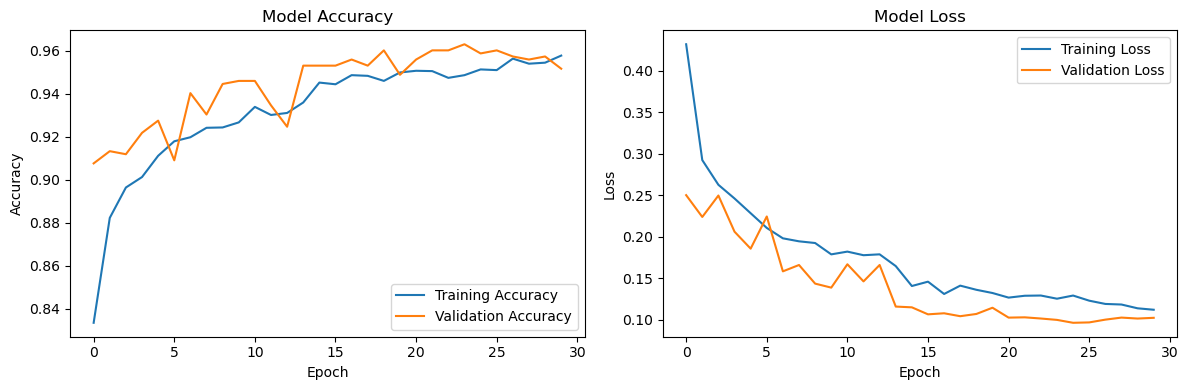

In [7]:
import os
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Image loading function
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                img_array = np.array(img)
                images.append(img_array)
                label = filename.split('.')[0].split('_')[1]
                label = 0 if label == 'B' else 1
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
x_train, y_train = load_and_preprocess_images('/Users/johannes/Desktop/FocusAreaDS/Images/full')

# Split data
x_temp, x_test_final, y_temp, y_test_final = train_test_split(
    x_train, y_train, 
    test_size=0.1,  # 10% for final testing
    random_state=40,
    stratify=y_train
)

# Second split: separate validation set from remaining data
x_train_DenseNet, x_val_DenseNet, y_train_DenseNet, y_val_DenseNet = train_test_split(
    x_temp, y_temp,
    test_size=0.1,  # 10% of remaining data for validation
    random_state=40,
    stratify=y_temp
)

# Create data augmentation generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,          # Random rotation between -20 and +20 degrees
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    shear_range=0.2,           # Random shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest',       # Strategy for filling newly created pixels
)

# Validation data should only be preprocessed, not augmented
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

# Create generators
train_generator_full = train_datagen.flow(
    x_train_DenseNet,
    y_train_DenseNet,
    batch_size=batch_size,
    shuffle=True
)

validation_generator_full = val_datagen.flow(
    x_val_DenseNet,
    y_val_DenseNet,
    batch_size=batch_size,
    shuffle=False
)

test_generator_Dense_full = val_datagen.flow(
    x_test_final,
    y_test_final,
    batch_size=batch_size,
    shuffle=False
)


# Load pre-trained DenseNet121 model
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# First phase: Train only the top layers
base_model.trainable = False

# Enhanced custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
DenseNet_model_full = Model(inputs=base_model.input, outputs=output)

# First phase compilation
DenseNet_model_full.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Add callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)



# Calculate steps per epoch
steps_per_epoch = len(x_train_DenseNet) // batch_size
validation_steps = len(x_val_DenseNet) // batch_size
test_steps = len(x_test_final) // batch_size

# First training phase
print("First training phase - training top layers only:")
history_phase_Dense_full = DenseNet_model_full.fit(
    train_generator_full,
    steps_per_epoch=steps_per_epoch,
    epochs=30,  # Reduced epochs for first phase
    validation_data=validation_generator_full,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)

# Second phase: Fine-tune the top layers of the base model
# Unfreeze some layers of the base model
#for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
#    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
#DenseNet_model.compile(
#    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
#    loss='binary_crossentropy',
#    metrics=['accuracy', 'Precision', 'Recall']
#)

# Second training phase
#print("Second training phase - fine-tuning:")
#history_phase2 = DenseNet_model.fit(
#    train_generator,
#    steps_per_epoch=steps_per_epoch,
#    epochs=30,
#    validation_data=validation_generator,
#    validation_steps=validation_steps,
#    callbacks=[reduce_lr, early_stopping]
#)

# Final evaluation on test set
print("Final evaluation on test set:")
test_score = DenseNet_model_full.evaluate(test_generator_Dense_full, steps=test_steps, verbose=1)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

import matplotlib.pyplot as plt

def plot_training_history(history1):
    # Combine histories
    acc = history1.history['accuracy'] 
    val_acc = history1.history['val_accuracy'] 
    loss = history1.history['loss'] 
    val_loss = history1.history['val_loss'] 
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
#plot_training_history(history_p

# Plot the training history
plot_training_history(history_phase_Dense_full)

Comparison + Ensembl test below

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def predict_and_visualize_samples(model, test_generator, num_samples=10):
    """
    Randomly select and display images with their predictions
    """
    # Get a batch of images and their true labels
    images, true_labels = next(test_generator)
    
    # Make predictions (images are already preprocessed in the generator)
    predictions = model.predict(images)
    predictions = (predictions > 0.5).astype(int)
    
    # Create a figure with subplots
    plt.figure(figsize=(20, 4))
    for i in range(min(num_samples, len(images))):
        plt.subplot(2, 5, i + 1)
        
        # Convert the preprocessed image back to display format
        img = images[i]
        # Undo the preprocessing to display the image correctly
        img = img.astype(np.float32)
        img /= 2.
        img += 0.5
        img = np.clip(img, 0, 1)
        
        plt.imshow(img)
        
        # Add title with true label and prediction
        title_color = 'green' if predictions[i] == true_labels[i] else 'red'
        plt.title(f'True: {true_labels[i]}\nPred: {predictions[i][0]}', 
                 color=title_color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
def create_confusion_matrix(model, test_generator, steps=None):
    """
    Create and display a confusion matrix using a test generator and visualize misclassified images
    
    Parameters:
    -----------
    model : keras.Model
        The trained model
    test_generator : keras.utils.Sequence
        Generator for test data
    steps : int, optional
        Number of steps to evaluate. If None, uses the generator's __len__
    """
    if steps is None:
        steps = len(test_generator)
    
    # Lists to store all predictions, true labels, and images
    all_predictions = []
    all_true_labels = []
    all_images = []
    all_probabilities = []
    
    # Collect predictions and true labels for all batches
    for i in range(steps):
        images, labels = next(test_generator)
        predictions = model.predict(images, verbose=0)
        predictions_binary = (predictions > 0.5).astype(int)
        
        all_predictions.extend(predictions_binary)
        all_true_labels.extend(labels)
        all_images.extend(images)
        all_probabilities.extend(predictions)
    
    # Convert lists to numpy arrays
    all_predictions = np.array(all_predictions)
    all_true_labels = np.array(all_true_labels)
    all_images = np.array(all_images)
    all_probabilities = np.array(all_probabilities)
    
    # Create confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_true_labels, all_predictions))
    
    # Print additional metrics
    tn, fp, fn, tp = cm.ravel()
    print("\nDetailed Metrics:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.3f}")
    print(f"Precision: {tp / (tp + fp) if (tp + fp) > 0 else 0:.3f}")
    print(f"Recall: {tp / (tp + fn) if (tp + fn) > 0 else 0:.3f}")
    print(f"Specificity: {tn / (tn + fp) if (tn + fp) > 0 else 0:.3f}")
    
    # Find misclassified examples
    misclassified_idx = np.where(all_predictions.flatten() != all_true_labels)[0]
    num_samples = min(8, len(misclassified_idx))
    
    if len(misclassified_idx) > 0:
        plt.figure(figsize=(20, 8))
        for i, idx in enumerate(misclassified_idx[:num_samples]):
            plt.subplot(2, num_samples//2, i + 1)
            
            # Get the original image
            img = all_images[idx]
            
            # Convert the preprocessed image back to display format
            img = img.astype(np.float32)
            img /= 2.
            img += 0.5
            img = np.clip(img, 0, 1)
            
            plt.imshow(img)
            plt.title(f'True: {all_true_labels[idx]}\nPred: {all_predictions[idx][0]}\nConf: {all_probabilities[idx][0]:.2f}',
                     color='red')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No misclassifications found in this batch.")
def analyze_misclassifications(model, x_test, y_test, num_samples=8):
    """
    Display misclassified images
    """
    # Preprocess the test data
    x_test_preprocessed = preprocess_input(x_test.copy())
    # Get predictions
    predictions = model.predict(x_test_preprocessed)
    predictions_binary = (predictions > 0.5).astype(int)
    
    # Find misclassified samples
    misclassified_idx = np.where(predictions_binary.flatten() != y_test)[0]
    
    if len(misclassified_idx) > 0:
        plt.figure(figsize=(20, 8))
        for i, idx in enumerate(misclassified_idx[:num_samples]):
            plt.subplot(1, num_samples, i + 1)
            
            # Display original (non-preprocessed) image
            img = x_test[idx]
            
            plt.imshow(img.astype('uint8'))
            plt.title(f'True: {y_test[idx]}\nPred: {predictions_binary[idx][0]}\nConf: {predictions[idx][0]:.2f}',
                     color='red')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No misclassifications found in this batch.")

def predict_single_image(model, image_path):
    """
    Make prediction for a single image
    """
    # Load and preprocess the image
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img)
    
    # Save original image for display
    img_display = img_array.copy()
    
    # Preprocess for prediction
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make prediction
    prediction = model.predict(img_array)
    prob = prediction[0][0]
    pred_class = 1 if prob > 0.5 else 0
    
    # Display original image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_display)
    plt.title(f'Predicted Class: {pred_class}\nProbability: {prob:.3f}')
    plt.axis('off')
    plt.show()
    
    return pred_class, prob

def create_confusion_matrix_original(model, x_test, y_test, num_samples=8):
    """
    Create and display a confusion matrix using test data and visualize misclassified images
    
    Parameters:
    -----------
    model : keras.Model
        The trained model
    x_test : numpy.ndarray
        Test images
    y_test : numpy.ndarray
        True labels
    num_samples : int, optional
        Number of misclassified samples to display
    """
    # Get predictions
    predictions = model.predict(x_test, verbose=0)
    predictions_binary = (predictions > 0.5).astype(int)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions_binary)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions_binary))
    
    # Print additional metrics
    tn, fp, fn, tp = cm.ravel()
    print("\nDetailed Metrics:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.3f}")
    print(f"Precision: {tp / (tp + fp) if (tp + fp) > 0 else 0:.3f}")
    print(f"Recall: {tp / (tp + fn) if (tp + fn) > 0 else 0:.3f}")
    print(f"Specificity: {tn / (tn + fp) if (tn + fp) > 0 else 0:.3f}")
    
    # Find misclassified examples
    misclassified_idx = np.where(predictions_binary.flatten() != y_test)[0]
    num_samples = min(num_samples, len(misclassified_idx))
    
    if len(misclassified_idx) > 0:
        plt.figure(figsize=(20, 8))
        for i, idx in enumerate(misclassified_idx[:num_samples]):
            plt.subplot(2, num_samples//2, i + 1)
            
            # Get the original image
            img = x_test[idx]
            
            # Display the image
            plt.imshow(img.astype('uint8'))
            plt.title(f'True: {y_test[idx]}\nPred: {predictions_binary[idx][0]}',
                     color='red')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed information about misclassified images
        print("\nMisclassified Images Summary:")
        print(f"Total misclassified: {len(misclassified_idx)}")
        print(f"False Positives (predicted 1, actually 0): {np.sum((predictions_binary.flatten() == 1) & (y_test == 0))}")
        print(f"False Negatives (predicted 0, actually 1): {np.sum((predictions_binary.flatten() == 0) & (y_test == 1))}")
    else:
        print("No misclassifications found in the test set.")

# 1. Visualize random samples with their predictions
print("Visualizing random samples with predictions for DenseNet:")
predict_and_visualize_samples(DenseNet_model, test_generator_Dense)

# 2. Create and display confusion matrix
print("\nGenerating confusion matrix for DenseNet:")
create_confusion_matrix(DenseNet_model, test_generator_Dense)
create_confusion_matrix_original(DenseNet_model, x_test_final, y_test_final)

# 3. Analyze misclassifications
#print("\nAnalyzing misclassified samples for DenseNet:")
#analyze_misclassifications(DenseNet_model, x_test_final, y_test_final)

# 1. Visualize random samples with their predictions
print("Visualizing random samples with predictions for ResNet:")
predict_and_visualize_samples(Resnet_model, test_generator)

# 2. Create and display confusion matrix
print("\nGenerating confusion matrix for ResNet:")
create_confusion_matrix(Resnet_model, test_generator)
create_confusion_matrix_original(Resnet_model, x_test_final, y_test_final)

# 3. Analyze misclassifications
#print("\nAnalyzing misclassified samples for ResNet:")
#analyze_misclassifications(Resnet_model, x_test_final, y_test_final)

# 1. Visualize random samples with their predictions
print("Visualizing random samples with predictions for VGG:")
predict_and_visualize_samples(VGG19_model, test_generator)

# 2. Create and display confusion matrix
print("\nGenerating confusion matrix for VGG:")
create_confusion_matrix(VGG19_model, test_generator)
create_confusion_matrix_original(Resnet_model, x_test_final, y_test_final)

# 3. Analyze misclassifications
#print("\nAnalyzing misclassified samples for VGG:")
#analyze_misclassifications(VGG19_model, x_test_final, y_test_final)

# 4. Example of predicting a single image
# print("\nPredicting single image:")
# pred_class, prob = predict_single_image(DenseNet_model, 'path_to_your_image.jpg')
# print(f"Predicted class: {pred_class}")
# print(f"Probability: {prob:.3f}")

Individual Model Performances:

Model 1:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       176
           1       0.92      0.93      0.92       337

    accuracy                           0.90       513
   macro avg       0.89      0.88      0.88       513
weighted avg       0.90      0.90      0.90       513


Model 2:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       176
           1       1.00      0.98      0.99       337

    accuracy                           0.98       513
   macro avg       0.98      0.99      0.98       513
weighted avg       0.99      0.98      0.98       513


Model 3:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       176
           1       0.97      0.98      0.98       337

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg 

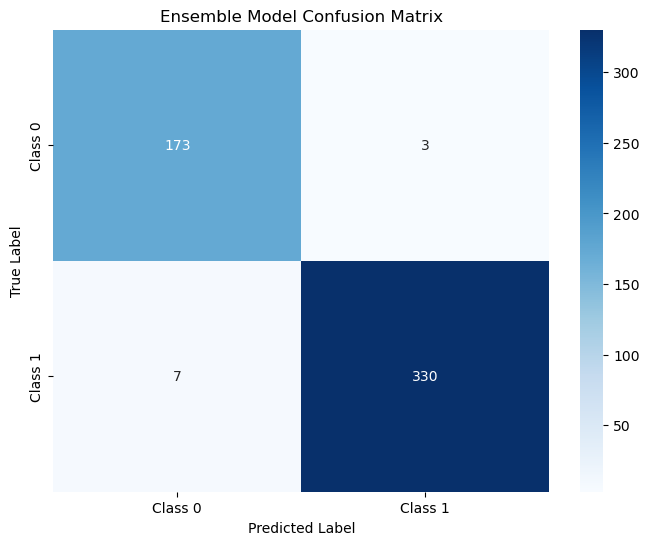


Detailed Ensemble Metrics:
True Negatives: 173
False Positives: 3
False Negatives: 7
True Positives: 330
Accuracy: 0.981
Precision: 0.991
Recall: 0.979
Specificity: 0.983


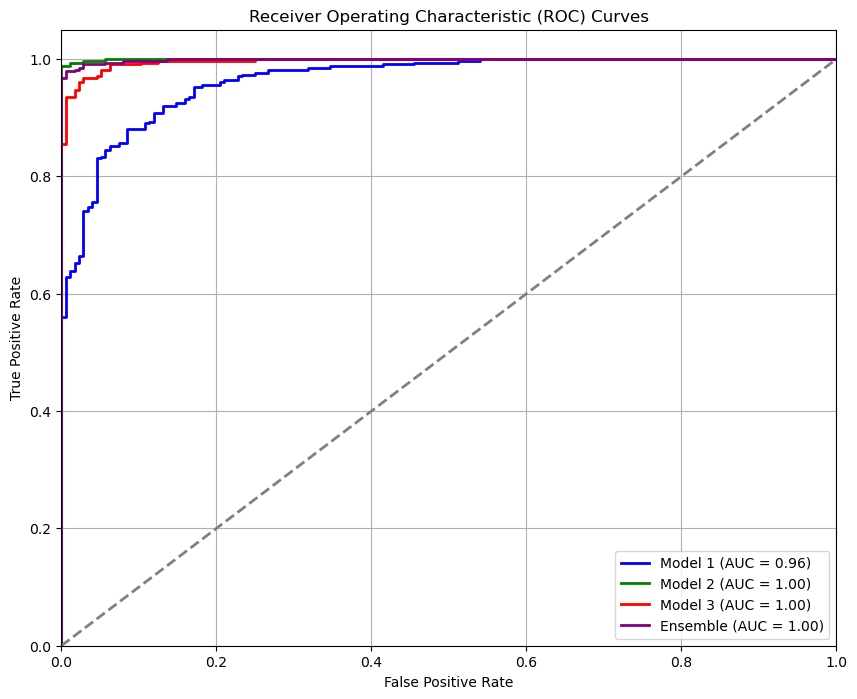

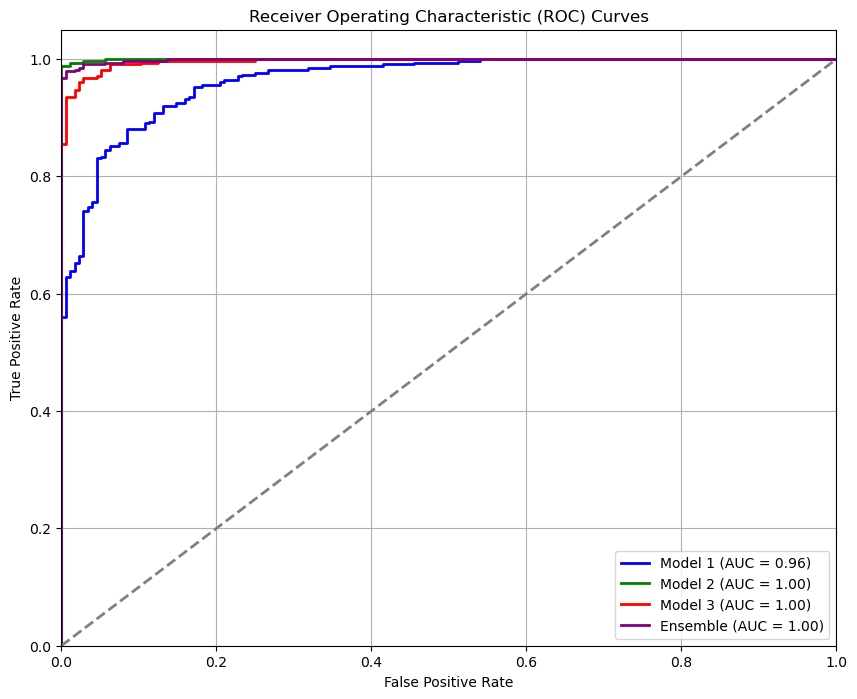

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def ensemble_predict(models, test_generator, steps=None, return_probabilities=False):
    """
    Make predictions using an ensemble of models with majority voting
    
    Parameters:
    -----------
    models : list
        List of three pre-trained Keras models
    test_generator : keras.utils.Sequence
        Generator for test data
    steps : int, optional
        Number of steps to evaluate. If None, uses the generator's __len__
    return_probabilities : bool, optional
        If True, returns raw probabilities for ROC curve calculation
    
    Returns:
    --------
    tuple
        (majority_predictions, individual_predictions, true_labels, probabilities)
        - majority_predictions: Array of final predictions after majority voting
        - individual_predictions: List of arrays containing each model's predictions
        - true_labels: Array of true labels
        - probabilities: List of arrays containing each model's probabilities (if return_probabilities=True)
    """
    if len(models) != 3:
        raise ValueError("Exactly three models are required for majority voting")
        
    if steps is None:
        steps = len(test_generator)
    
    # Lists to store predictions and probabilities from each model and true labels
    model_predictions = [[] for _ in range(3)]
    model_probabilities = [[] for _ in range(3)]
    all_true_labels = []
    
    # Collect predictions from each model
    for i in range(steps):
        images, labels = next(test_generator)
        
        # Get predictions from each model
        for j, model in enumerate(models):
            probabilities = model.predict(images, verbose=0)
            predictions = (probabilities > 0.5).astype(int)
            model_predictions[j].extend(predictions)
            model_probabilities[j].extend(probabilities)
            
        # Only need to collect labels once
        all_true_labels.extend(labels)
    
    # Convert lists to numpy arrays
    model_predictions = [np.array(preds) for preds in model_predictions]
    model_probabilities = [np.array(probs) for probs in model_probabilities]
    all_true_labels = np.array(all_true_labels)
    
    # Stack predictions for voting (shape: n_samples x n_models)
    stacked_predictions = np.column_stack([preds.flatten() for preds in model_predictions])
    
    # Calculate average probabilities for ensemble
    ensemble_probabilities = np.mean([probs.flatten() for probs in model_probabilities], axis=0)
    
    # Perform majority voting
    majority_predictions = (ensemble_probabilities > 0.5).astype(int)
    
    if return_probabilities:
        return majority_predictions, model_predictions, all_true_labels, model_probabilities, ensemble_probabilities
    return majority_predictions, model_predictions, all_true_labels

def plot_roc_curves(models, test_generator, steps=None):
    """
    Plot ROC curves for individual models and ensemble
    
    Parameters:
    -----------
    models : list
        List of three pre-trained Keras models
    test_generator : keras.utils.Sequence
        Generator for test data
    steps : int, optional
        Number of steps to evaluate. If None, uses the generator's __len__
    """
    # Get predictions and probabilities
    majority_preds, individual_preds, true_labels, individual_probs, ensemble_probs = \
        ensemble_predict(models, test_generator, steps, return_probabilities=True)
    
    plt.figure(figsize=(10, 8))
    
    # Plot ROC curve for each individual model
    colors = ['blue', 'green', 'red']
    for i, probabilities in enumerate(individual_probs):
        fpr, tpr, _ = roc_curve(true_labels, probabilities.flatten())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                label=f'Model {i+1} (AUC = {roc_auc:.2f})')
    
    # Plot ROC curve for ensemble
    fpr, tpr, _ = roc_curve(true_labels, ensemble_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='purple', lw=2,
            label=f'Ensemble (AUC = {roc_auc:.2f})')
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def evaluate_ensemble(models, test_generator, steps=None):
    """
    Evaluate the ensemble model and print detailed metrics
    
    Parameters:
    -----------
    models : list
        List of three pre-trained Keras models
    test_generator : keras.utils.Sequence
        Generator for test data
    steps : int, optional
        Number of steps to evaluate. If None, uses the generator's __len__
    """
    # Get predictions
    majority_predictions, individual_predictions, true_labels = ensemble_predict(
        models, test_generator, steps
    )
    
    # Print individual model performances
    print("Individual Model Performances:")
    for i, preds in enumerate(individual_predictions):
        cm = confusion_matrix(true_labels, preds.flatten())
        print(f"\nModel {i+1}:")
        print(classification_report(true_labels, preds.flatten()))
        
    # Print ensemble performance
    print("\nEnsemble Model Performance:")
    cm = confusion_matrix(true_labels, majority_predictions)
    print(classification_report(true_labels, majority_predictions))
    
    # Plot confusion matrix for ensemble
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Ensemble Model Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Calculate and print detailed metrics for ensemble
    tn, fp, fn, tp = cm.ravel()
    print("\nDetailed Ensemble Metrics:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.3f}")
    print(f"Precision: {tp / (tp + fp) if (tp + fp) > 0 else 0:.3f}")
    print(f"Recall: {tp / (tp + fn) if (tp + fn) > 0 else 0:.3f}")
    print(f"Specificity: {tn / (tn + fp) if (tn + fp) > 0 else 0:.3f}")
    
    # Plot ROC curves
    plot_roc_curves(models, test_generator, steps)

# Assuming you have three pre-trained models
models = [DenseNet_model, Resnet_model, VGG19_model]

# For full evaluation including ROC curves
evaluate_ensemble(models, test_generator)

# Or if you just want to plot ROC curves
plot_roc_curves(models, test_generator)

Visualizing random samples with predictions for full Resnet:
1/1 [==============================] - 1s 1s/step


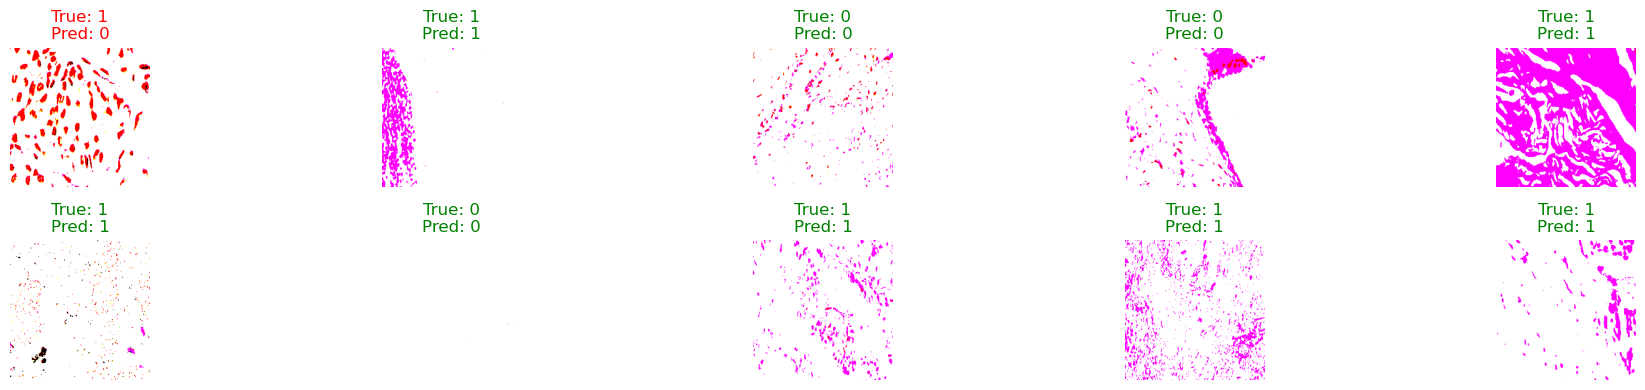


Generating confusion matrix for full ResNet:


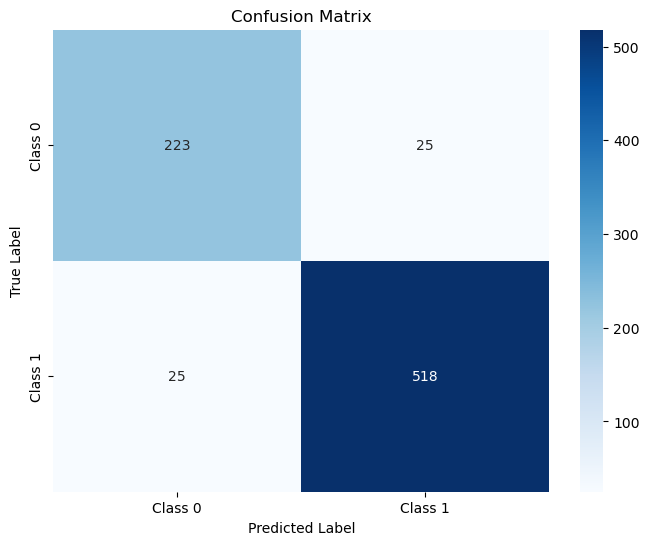


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       248
           1       0.95      0.95      0.95       543

    accuracy                           0.94       791
   macro avg       0.93      0.93      0.93       791
weighted avg       0.94      0.94      0.94       791


Detailed Metrics:
True Negatives: 223
False Positives: 25
False Negatives: 25
True Positives: 518
Accuracy: 0.937
Precision: 0.954
Recall: 0.954
Specificity: 0.899

Analyzing misclassified samples for full ResNet:
25/25 [==============================] - 20s 791ms/step


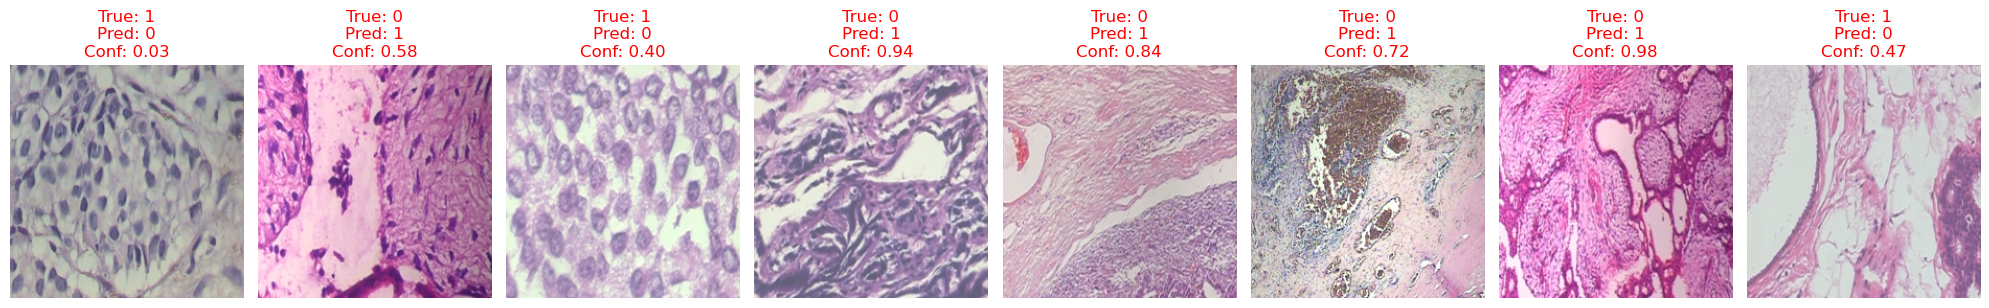

In [ ]:
# 1. Visualize random samples with their predictions
print("Visualizing random samples with predictions for full Resnet:")
predict_and_visualize_samples(Resnet_model_full, test_generator_full)

# 2. Create and display confusion matrix
print("\nGenerating confusion matrix for full ResNet:")
create_confusion_matrix(Resnet_model_full, test_generator_full)

BACH dataset testing

In [ ]:
import os
from PIL import Image
import numpy as np

def load_and_preprocess_images(base_path, img_size=(224, 224)):
    """
    Load and preprocess images from multiple directories
    
    Parameters:
    -----------
    base_path : str
        Base path to the ICIAR2018_BACH_Challenge/Photos directory
    img_size : tuple
        Target size for image resizing (width, height)
        
    Returns:
    --------
    tuple
        (images array, labels array)
    """
    # Define categories and their labels
    categories = {
        'Benign': 0,
        'Normal': 0,
        'InSitu': 1,
        'Invasive': 1
    }
    
    images = []
    labels = []
    valid_extensions = ('.jpg', '.png', '.tif')
    
    # Process each category
    for category, label in categories.items():
        category_path = os.path.join(base_path, category)
        
        # Skip if directory doesn't exist
        if not os.path.exists(category_path):
            print(f"Warning: Directory {category_path} not found")
            continue
            
        # Process all images in the category
        for filename in os.listdir(category_path):
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(category_path, filename)
                try:
                    # Load and preprocess image
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(img_size)
                    img_array = np.array(img)
                    
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing {filename} in {category}: {e}")
    
    # Convert lists to numpy arrays
    X = np.array(images)
    y = np.array(labels)
    
    print(f"Loaded {len(X)} images:")
    for category, label in categories.items():
        count = np.sum(y == label)
        print(f"{category}: {count} images (Label {label})")
    
    return X, y


# Load and preprocess images
x_train_new, y_train_new = load_and_preprocess_images('/Users/johannes/Downloads/archive/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos')

print(x_train_new, y_train_new)

# Split data
x_temp_temp, x_test_final_temp, y_temp_temp, y_test_final_temp = train_test_split(
    x_train_new, y_train_new, 
    test_size=0.9,  # 100% for final testing
    random_state=40,
    stratify=y_train_new
)


test_generator_full_new = val_datagen.flow(
    x_test_final_temp,
    y_test_final_temp,
    batch_size=batch_size,
    shuffle=False
)

# 1. Visualize random samples with their predictions
print("Visualizing random samples with predictions for full Resnet:")
predict_and_visualize_samples(Resnet_model_40X, test_generator_full_new)

# 2. Create and display confusion matrix
print("\nGenerating confusion matrix for full ResNet:")
create_confusion_matrix(Resnet_model_40X, test_generator_full_new)
create_confusion_matrix_original(Resnet_model_40X, x_test_final_temp, y_test_final_temp)
